<a href="https://colab.research.google.com/github/maxla777/Project-2/blob/Monique/Monique/ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamental Analysis

Market cap = current price * circulating supply
1.    NVT Ratio: (Network Value (market cap)) / Daily USD volume
    * NVT indicates whether a coin's price is overvalued or undervalued
    * NVT is a good indicator for revealing speculative value and possible bubbles
2.    MVRV Ratio: (Market cap) / (Realized cap)
    *   Good instrument for estimating if market participants are in profit or not
    *   MVRV is an excellent tool for determining if bitcoin is overvalued or undervalued during market cycles
    *   Negative MVRV ratio indicates market participants being not in profit, or minimally in profit 
    *   Positive MVRV indicates asset holders likely being in profit



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
csv_path = Path('/content/drive/MyDrive/Colab Notebooks/btc.csv')
btc_data=pd.read_csv(csv_path)
btc_data.tail()

,time,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
4448,2021-03-09T00:00:00.000Z,1088598.0,140.0,183831817.0,1.313084e+06,3.498556,1.020849e+12,2.917916e+11,2.144828e+13,0.000355,19.423635,0.000167,9.167163,106.248179,5.815933e+06,1.492680e+08,875.00,1.712527,4.789674e+07,875.00,4.789674e+07,66.214852,105.619998,1.0,54739.135254,593.217631,40.345917,1.864934e+07,2.057739e+07,1.455747e+07,299423.0,938346.0,281648.968287,1.541722e+10,0.616635,33754.086642,0.003600,197.060887,578617.328109,3.167301e+10,0.038893,0.051790,0.051605
4449,2021-03-10T00:00:00.000Z,1165773.0,149.0,194008352.0,1.302069e+06,3.562933,1.046580e+12,2.937410e+11,2.144828e+13,0.000319,17.907751,0.000170,9.511669,109.350972,6.136344e+06,1.588638e+08,931.25,1.822445,5.225806e+07,931.25,5.225806e+07,88.596092,107.409868,1.0,56116.040912,609.438086,21.668881,1.865028e+07,2.057762e+07,1.455754e+07,342661.0,982213.0,210509.016138,1.181293e+10,0.498878,27995.045791,0.003522,197.632840,490004.238791,2.749710e+10,0.038909,0.042687,0.051630
4450,2021-03-11T00:00:00.000Z,1084417.0,132.0,168874631.0,1.279353e+06,3.631770,1.078915e+12,2.970769e+11,2.144828e+13,0.000382,22.124840,0.000198,11.480945,112.244756,6.493051e+06,1.407384e+08,825.00,1.614516,4.772399e+07,825.00,4.772399e+07,79.352321,109.556390,1.0,57847.254936,628.615291,24.273983,1.865110e+07,2.057783e+07,1.456772e+07,293471.0,922585.0,235041.657001,1.359651e+10,0.588608,34049.338230,0.003529,204.123295,543040.611791,3.141341e+10,0.038939,0.042907,0.051171
4451,2021-03-12T00:00:00.000Z,1186618.0,150.0,197235362.0,1.314902e+06,3.570586,1.069408e+12,2.995049e+11,2.144828e+13,0.000364,20.854329,0.000177,10.145938,116.419908,6.674894e+06,1.599300e+08,937.50,1.834585,5.375123e+07,937.50,5.375123e+07,80.492506,107.390112,1.0,57334.641535,1056.100386,27.189490,1.865204e+07,2.057806e+07,1.456883e+07,320069.0,983349.0,231723.915787,1.328581e+10,0.537480,30816.215737,0.002970,170.283885,528530.293689,3.030309e+10,0.038933,0.042380,0.049837
4452,2021-03-13T00:00:00.000Z,1104466.0,143.0,201509838.0,1.409160e+06,3.789576,1.143216e+12,3.016738e+11,2.144828e+13,0.000421,25.808098,0.000194,11.913316,116.326589,7.129516e+06,1.524666e+08,893.75,1.748715,5.477686e+07,893.75,5.477686e+07,99.633855,113.971254,1.0,61288.794128,989.057288,27.970680,1.865293e+07,2.057828e+07,1.457003e+07,276253.0,870843.0,187214.802059,1.147417e+10,0.520009,31870.733623,0.002990,183.275558,452846.326564,2.775441e+10,0.039129,0.042655,0.049903


In [4]:
btc_data.set_index(pd.to_datetime(btc_data['time'], infer_datetime_format=True), inplace=True)
btc_data.drop(columns=['time'], inplace=True)
btc_data.tail()


,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-09 00:00:00+00:00,1088598.0,140.0,183831817.0,1.313084e+06,3.498556,1.020849e+12,2.917916e+11,2.144828e+13,0.000355,19.423635,0.000167,9.167163,106.248179,5.815933e+06,1.492680e+08,875.00,1.712527,4.789674e+07,875.00,4.789674e+07,66.214852,105.619998,1.0,54739.135254,593.217631,40.345917,1.864934e+07,2.057739e+07,1.455747e+07,299423.0,938346.0,281648.968287,1.541722e+10,0.616635,33754.086642,0.003600,197.060887,578617.328109,3.167301e+10,0.038893,0.051790,0.051605
2021-03-10 00:00:00+00:00,1165773.0,149.0,194008352.0,1.302069e+06,3.562933,1.046580e+12,2.937410e+11,2.144828e+13,0.000319,17.907751,0.000170,9.511669,109.350972,6.136344e+06,1.588638e+08,931.25,1.822445,5.225806e+07,931.25,5.225806e+07,88.596092,107.409868,1.0,56116.040912,609.438086,21.668881,1.865028e+07,2.057762e+07,1.455754e+07,342661.0,982213.0,210509.016138,1.181293e+10,0.498878,27995.045791,0.003522,197.632840,490004.238791,2.749710e+10,0.038909,0.042687,0.051630
2021-03-11 00:00:00+00:00,1084417.0,132.0,168874631.0,1.279353e+06,3.631770,1.078915e+12,2.970769e+11,2.144828e+13,0.000382,22.124840,0.000198,11.480945,112.244756,6.493051e+06,1.407384e+08,825.00,1.614516,4.772399e+07,825.00,4.772399e+07,79.352321,109.556390,1.0,57847.254936,628.615291,24.273983,1.865110e+07,2.057783e+07,1.456772e+07,293471.0,922585.0,235041.657001,1.359651e+10,0.588608,34049.338230,0.003529,204.123295,543040.611791,3.141341e+10,0.038939,0.042907,0.051171
2021-03-12 00:00:00+00:00,1186618.0,150.0,197235362.0,1.314902e+06,3.570586,1.069408e+12,2.995049e+11,2.144828e+13,0.000364,20.854329,0.000177,10.145938,116.419908,6.674894e+06,1.599300e+08,937.50,1.834585,5.375123e+07,937.50,5.375123e+07,80.492506,107.390112,1.0,57334.641535,1056.100386,27.189490,1.865204e+07,2.057806e+07,1.456883e+07,320069.0,983349.0,231723.915787,1.328581e+10,0.537480,30816.215737,0.002970,170.283885,528530.293689,3.030309e+10,0.038933,0.042380,0.049837
2021-03-13 00:00:00+00:00,1104466.0,143.0,201509838.0,1.409160e+06,3.789576,1.143216e+12,3.016738e+11,2.144828e+13,0.000421,25.808098,0.000194,11.913316,116.326589,7.129516e+06,1.524666e+08,893.75,1.748715,5.477686e+07,893.75,5.477686e+07,99.633855,113.971254,1.0,61288.794128,989.057288,27.970680,1.865293e+07,2.057828e+07,1.457003e+07,276253.0,870843.0,187214.802059,1.147417e+10,0.520009,31870.733623,0.002990,183.275558,452846.326564,2.775441e+10,0.039129,0.042655,0.049903


In [5]:
btc_data = btc_data.dropna().copy()
btc_data.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-07-18 00:00:00+00:00,27778.0,170.0,4578379.0,26931.641176,1.942074,9.334931e+07,4.806681e+07,1.563028e+06,0.001486,0.020256,0.0000,0.000000,12.946993,176.474270,13.208752,8500.0,45.301560,115859.430629,8500.0,115859.430629,19.892789,30.989318,1.0,13.630521,15778.985613,-19.228477,6848549.99,18578587.50,6.848547e+06,8712.0,23705.0,344272.985389,4.692620e+06,139.134619,1896.477386,0.35000,4.770682,3.298186e+06,4.495600e+07,0.096840,0.039919,0.115691
2011-07-19 00:00:00+00:00,25356.0,142.0,4178498.0,29426.042254,1.964390,9.477795e+07,4.824804e+07,1.588241e+06,0.001642,0.022704,0.0000,0.000000,14.831258,205.039097,11.211171,7100.0,37.800938,98156.043355,7100.0,98156.043355,34.786764,31.172344,1.0,13.824795,17009.894602,-21.049521,6855649.99,18579475.00,6.855647e+06,9031.0,24777.0,197076.395947,2.724541e+06,110.410539,1526.403051,0.31234,4.318042,2.735642e+06,3.781969e+07,0.095685,0.039263,0.112180
2011-07-20 00:00:00+00:00,25461.0,149.0,3834661.0,25735.979866,1.962968,9.387575e+07,4.782336e+07,1.690896e+06,0.001202,0.016445,0.0000,0.000000,10.438026,142.774767,12.524178,7450.0,39.621308,101903.562911,7450.0,101903.562911,27.946156,30.515647,1.0,13.678331,18202.264271,-21.885947,6863099.99,18580406.25,6.863097e+06,8682.0,24251.0,245582.970111,3.359165e+06,22.315422,305.237722,0.20000,2.735666,5.411713e+05,7.402320e+06,0.095626,0.039237,0.111902
2011-07-21 00:00:00+00:00,25378.0,152.0,3672287.0,24159.782895,1.952017,9.352265e+07,4.791077e+07,1.690896e+06,0.001113,0.015150,0.0000,0.000000,8.860440,120.606610,12.776343,7600.0,40.374343,103449.744158,7600.0,103449.744158,49.877146,30.215741,1.0,13.611808,17088.175785,-22.265841,6870699.99,18581356.25,6.870697e+06,7961.0,24592.0,137752.469191,1.875060e+06,54.063834,735.906549,0.13000,1.769535,1.329538e+06,1.809741e+07,0.095621,0.039212,0.111371
2011-07-22 00:00:00+00:00,24428.0,151.0,3850125.0,25497.516556,1.963113,9.422203e+07,4.799623e+07,1.690896e+06,0.001555,0.021301,0.0005,0.006849,13.870556,190.006464,12.692288,7550.0,40.064697,103424.032350,7550.0,103424.032350,43.467176,30.232118,1.0,13.698547,23328.430771,-21.770493,6878249.99,18582300.00,6.878247e+06,8920.0,23839.0,158240.094166,2.167659e+06,65.213669,893.332526,0.50000,6.849274,1.554629e+06,2.129615e+07,0.095620,0.039276,0.111251


In [6]:
# Copy needed columns - CapMrktCurUSD & CapRealUSD
btc_cap_df = btc_data[['CapMrktCurUSD', 'CapRealUSD']].copy()
btc_cap_df.tail()

,CapMrktCurUSD,CapRealUSD
time,,
2021-03-09 00:00:00+00:00,1.020849e+12,2.917916e+11
2021-03-10 00:00:00+00:00,1.046580e+12,2.937410e+11
2021-03-11 00:00:00+00:00,1.078915e+12,2.970769e+11
2021-03-12 00:00:00+00:00,1.069408e+12,2.995049e+11
2021-03-13 00:00:00+00:00,1.143216e+12,3.016738e+11


In [7]:
btc_cap_df['MVRV'] = btc_cap_df['CapMrktCurUSD'] / btc_cap_df['CapRealUSD']
btc_cap_df.tail()

,CapMrktCurUSD,CapRealUSD,MVRV
time,,,
2021-03-09 00:00:00+00:00,1.020849e+12,2.917916e+11,3.498556
2021-03-10 00:00:00+00:00,1.046580e+12,2.937410e+11,3.562933
2021-03-11 00:00:00+00:00,1.078915e+12,2.970769e+11,3.631770
2021-03-12 00:00:00+00:00,1.069408e+12,2.995049e+11,3.570586
2021-03-13 00:00:00+00:00,1.143216e+12,3.016738e+11,3.789576


In [8]:
btc_cap_df['MVRV_change'] = btc_cap_df['MVRV'].diff()
btc_cap_df.tail()

,CapMrktCurUSD,CapRealUSD,MVRV,MVRV_change
time,,,,
2021-03-09 00:00:00+00:00,1.020849e+12,2.917916e+11,3.498556,0.148533
2021-03-10 00:00:00+00:00,1.046580e+12,2.937410e+11,3.562933,0.064378
2021-03-11 00:00:00+00:00,1.078915e+12,2.970769e+11,3.631770,0.068837
2021-03-12 00:00:00+00:00,1.069408e+12,2.995049e+11,3.570586,-0.061184
2021-03-13 00:00:00+00:00,1.143216e+12,3.016738e+11,3.789576,0.218990


In [9]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
btc_cap_df['fast_MVRV'] = btc_cap_df['MVRV'].ewm(halflife=short_window).mean()
btc_cap_df['slow_MVRV'] = btc_cap_df['MVRV'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
btc_cap_df['MVRV_long'] = np.where(btc_cap_df['fast_MVRV'] > btc_cap_df['slow_MVRV'], 1.0, 0.0)
btc_cap_df['MVRV_short'] = np.where(btc_cap_df['fast_MVRV'] < btc_cap_df['slow_MVRV'], -1.0, 0.0)
btc_cap_df['MVRV_signal'] = btc_cap_df['MVRV_long'] + btc_cap_df['MVRV_short']

btc_cap_df.head()

,CapMrktCurUSD,CapRealUSD,MVRV,MVRV_change,fast_MVRV,slow_MVRV,MVRV_long,MVRV_short,MVRV_signal
time,,,,,,,,,
2011-07-18 00:00:00+00:00,9.334931e+07,4.806681e+07,1.942074,NaN,1.942074,1.942074,0.0,0.0,0.0
2011-07-19 00:00:00+00:00,9.477795e+07,4.824804e+07,1.964390,0.022316,1.956951,1.953618,1.0,0.0,1.0
2011-07-20 00:00:00+00:00,9.387575e+07,4.782336e+07,1.962968,-0.001421,1.960390,1.956953,1.0,0.0,1.0
2011-07-21 00:00:00+00:00,9.352265e+07,4.791077e+07,1.952017,-0.010951,1.955924,1.955588,1.0,0.0,1.0
2011-07-22 00:00:00+00:00,9.422203e+07,4.799623e+07,1.963113,0.011096,1.959635,1.957309,1.0,0.0,1.0


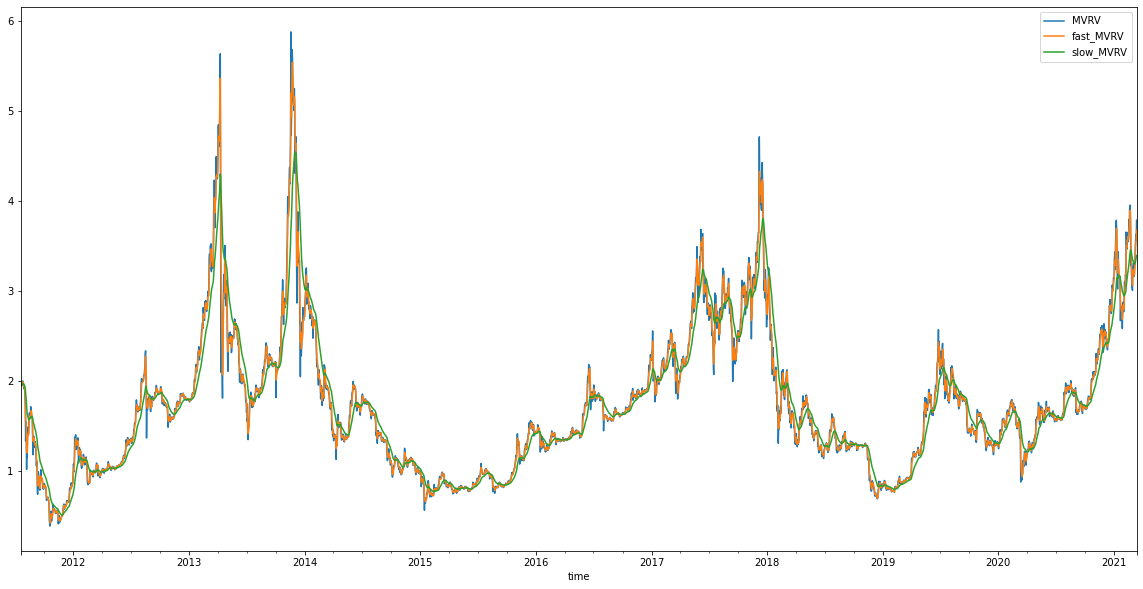

In [10]:
btc_cap_df[['MVRV', 'fast_MVRV', 'slow_MVRV']].plot(figsize=(20,10))

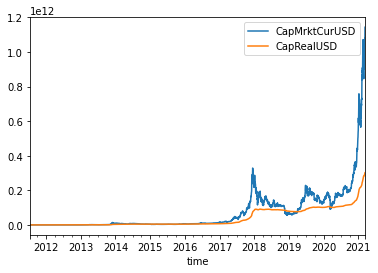

In [11]:
btc_cap_df[['CapMrktCurUSD', 'CapRealUSD']].plot()

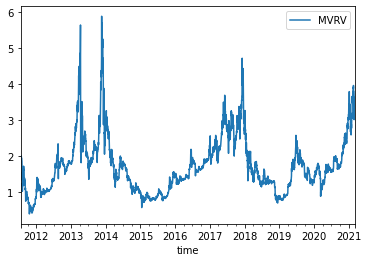

In [12]:
btc_cap_df[['MVRV']].plot()

# Machine Learning Models

To be updated with dates group decides on

In [13]:
csv_path = Path('/content/drive/MyDrive/Colab Notebooks/kraken_pull_EthExample.csv')
eth_data=pd.read_csv(csv_path)
eth_data.set_index(pd.to_datetime(eth_data['Date'], infer_datetime_format=True), inplace=True)
eth_data.drop(columns=['Date'], inplace=True)
eth_data.head()

,Open,High,Low,Close,Volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,Positive Return
Date,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-28,139.02,139.24,136.75,137.35,13222.478652,-0.012936,138.187716,138.234406,0.0,-1.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2019-03-29,137.35,143.00,136.87,142.71,27335.951007,0.039024,139.908257,139.778263,1.0,0.0,-1.0,0.036741,0.036741,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2019-03-30,142.74,145.49,139.63,142.01,25780.580602,-0.004905,140.547441,140.365528,1.0,0.0,1.0,0.027695,0.027909,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2019-03-31,142.11,142.14,140.13,141.29,7464.446089,-0.005070,140.739689,140.563455,1.0,0.0,1.0,0.022780,0.023458,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2019-04-01,141.07,143.00,138.60,141.05,30807.373778,-0.001699,140.810820,140.651731,1.0,0.0,1.0,0.019178,0.020337,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [14]:
eth_data.tail()

,Open,High,Low,Close,Volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,Positive Return
Date,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-11,1795.44,1847.73,1724.65,1826.87,71185.384072,0.017307,1703.332047,1515.205237,1.0,0.0,1.0,0.048151,0.057329,1.0,0.0,1.0,1652.1955,168.657667,1820.853167,1483.537833,0.0,-1.0,0.0,1.0
2021-03-12,1826.92,1840.64,1722.02,1767.06,60538.007946,-0.032739,1711.581594,1523.784335,1.0,0.0,1.0,0.047566,0.056980,1.0,0.0,1.0,1644.7480,159.431427,1804.179427,1485.316573,0.0,0.0,-1.0,0.0
2021-03-13,1767.77,1942.71,1727.70,1920.17,85219.275813,0.086647,1738.583246,1537.286686,1.0,0.0,1.0,0.052442,0.057619,1.0,0.0,1.0,1643.9845,157.996169,1801.980669,1485.988331,0.0,-1.0,0.0,1.0
2021-03-14,1920.98,1930.85,1838.25,1847.80,56996.943117,-0.037689,1752.721293,1547.863909,1.0,0.0,1.0,0.052468,0.057391,1.0,0.0,1.0,1647.4335,161.801574,1809.235074,1485.631926,0.0,-1.0,-1.0,0.0
2021-03-15,1847.80,1890.99,1840.11,1840.93,17429.181075,-0.003718,1764.139861,1557.846816,1.0,0.0,1.0,0.049177,0.056646,1.0,0.0,1.0,1660.5220,166.507260,1827.029260,1494.014740,0.0,-1.0,-1.0,0.0


In [15]:
# Construct training start and end dates
training_start = eth_data.index.min().strftime(format= '%Y-%m-%d')
# training_start = '2020-12-15'
training_end = '2020-08-20'

# Construct testing start and end dates
testing_start = '2020-08-21'
# testing_end = '2021-02-16'
testing_end = eth_data.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2019-03-28
Training End: 2020-08-20
Testing Start: 2020-08-21
Testing End: 2021-03-15


In [61]:
eth_data.isna().sum()

Open                     0
High                     0
Low                      0
Close                    0
Volume                   0
daily_return             0
fast_close               0
slow_close               0
crossover_long           0
crossover_short          0
crossover_signal         0
fast_vol                 1
slow_vol                 1
vol_trend_long           0
vol_trend_short          0
vol_trend_signal         0
bollinger_mid_band      18
bollinger_std           18
bollinger_upper_band    18
bollinger_lower_band    18
bollinger_long           0
bollinger_short          0
bollinger_signal         0
Positive Return          0
dtype: int64

In [49]:
# Create features
X = eth_data.drop(columns='Positive Return')
X = X.round(2)

# Create target
y = eth_data['Positive Return']

In [50]:
# Construct the X_train and y_train datasets
X_train = X[training_start:training_end]
y_train = eth_data['Positive Return'][training_start:training_end]

X_train.tail()

,Open,High,Low,Close,Volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Date,,,,,,,,,,,,,,,,,,,,,,,
2020-08-16,432.52,437.49,412.48,433.67,64246.02,0.00,397.47,316.50,1.0,0.0,1.0,0.04,0.04,0.0,-1.0,-1.0,385.46,34.77,420.23,350.69,0.0,-1.0,-1.0
2020-08-17,433.99,447.44,420.51,431.35,70593.78,-0.01,401.86,320.42,1.0,0.0,1.0,0.04,0.04,1.0,0.0,-1.0,391.15,32.28,423.43,358.88,0.0,-1.0,-1.0
2020-08-18,431.34,434.20,412.11,422.62,77628.46,-0.02,404.54,323.90,1.0,0.0,1.0,0.04,0.04,1.0,0.0,1.0,396.38,28.02,424.39,368.36,0.0,0.0,-1.0
2020-08-19,422.61,426.50,393.33,407.57,91227.61,-0.04,404.94,326.75,1.0,0.0,1.0,0.04,0.04,1.0,0.0,1.0,399.99,24.11,424.10,375.89,0.0,0.0,0.0
2020-08-20,407.57,419.54,402.48,416.20,58454.61,0.02,406.39,329.80,1.0,0.0,1.0,0.04,0.04,1.0,0.0,1.0,403.45,20.85,424.30,382.61,0.0,0.0,0.0


In [51]:
X_train.shape

(512, 23)

In [52]:
y_train.shape

(512,)

In [53]:
from sklearn.preprocessing import StandardScaler
#Create the StandardScaler instance
scaler = StandardScaler()

In [54]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [55]:
# Construct the X test and y test datasets
X_test = X[testing_start:testing_end]
y_test = y[testing_start:testing_end]

X_test.tail()

,Open,High,Low,Close,Volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Date,,,,,,,,,,,,,,,,,,,,,,,
2021-03-11,1795.44,1847.73,1724.65,1826.87,71185.38,0.02,1703.33,1515.21,1.0,0.0,1.0,0.05,0.06,1.0,0.0,1.0,1652.20,168.66,1820.85,1483.54,0.0,-1.0,0.0
2021-03-12,1826.92,1840.64,1722.02,1767.06,60538.01,-0.03,1711.58,1523.78,1.0,0.0,1.0,0.05,0.06,1.0,0.0,1.0,1644.75,159.43,1804.18,1485.32,0.0,0.0,-1.0
2021-03-13,1767.77,1942.71,1727.70,1920.17,85219.28,0.09,1738.58,1537.29,1.0,0.0,1.0,0.05,0.06,1.0,0.0,1.0,1643.98,158.00,1801.98,1485.99,0.0,-1.0,0.0
2021-03-14,1920.98,1930.85,1838.25,1847.80,56996.94,-0.04,1752.72,1547.86,1.0,0.0,1.0,0.05,0.06,1.0,0.0,1.0,1647.43,161.80,1809.24,1485.63,0.0,-1.0,-1.0
2021-03-15,1847.80,1890.99,1840.11,1840.93,17429.18,-0.00,1764.14,1557.85,1.0,0.0,1.0,0.05,0.06,1.0,0.0,1.0,1660.52,166.51,1827.03,1494.01,0.0,-1.0,-1.0


In [56]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# AdaBoost

In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, accuracy_score, classification_report, precision_recall_curve, roc_auc_score

In [58]:
# Fit a SKLearn linear regression using the training set (X_train, y_train):
model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=300,
    random_state=0
)
model.fit(X_train_scaled, y_train)

# Make a prediction of "y" values from the X_test dataset
AB_predictions = model.predict(X_test_scaled)

# Assemble actual y data (y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = AB_predictions
Results

ValueError: ignored

In [ ]:
Results[['Positive Return','Predicted Value']].plot(figsize=(20,10))

## Features

In [ ]:
AB_importances = model.feature_importances_

AB_importances_sorted = sorted(zip(model.feature_importances_, X.columns), reverse=True)
AB_importances_sorted

## Metrics

In [ ]:
# Will make this a def function so that it's cleaner and easier to read in the final output for each model
# Compute confusion matrix
AB_cm = confusion_matrix(y_test, AB_predictions)
# Create a DataFrame with the labelled classes
AB_cm_df = pd.DataFrame(
    AB_cm, index=['Actual Not Positive', 'Actual Positive'], columns=['Predicted Not Positive', 'Predicted Positive']
)
# Set target names for the classification report
AB_target_names = ['Not Positive', 'Positive']
# Compute the accuracy score
AB_acc_score = accuracy_score(y_test, AB_predictions)
# Compute the balanced accuracy score
AB_bal_acc_score = balanced_accuracy_score(y_test, AB_predictions)
# Predict class probabilities for the features 
AB_probs = model.predict_proba(X_test_scaled)[:,1]
# Compute precision-recall pairs
AB_precision, AB_recall, _ = precision_recall_curve(y_test, AB_probs, pos_label=1)
# Compute the AUPRC - the area under the curve
auprc_score = roc_auc_score(y_test, AB_probs)

In [ ]:
print("Accuracy Score:", AB_acc_score)
print("Balanced Accuracy Score:", AB_bal_acc_score)
print("Classification Report:")
print(classification_report(y_test, AB_predictions, target_names=AB_target_names))
print("Confusion Matrix:")
display(AB_cm_df)
print("Precision-Recall Curve")
print("Area Under the Curve:", auprc_score)
plt.plot(AB_recall, AB_precision, marker='x')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
# Fit a SKLearn linear regression using just the training set (X_train, y_train):
model = RandomForestClassifier(n_estimators=300, max_depth=1, random_state=0)
model.fit(X_train_scaled, y_train)

# Make a prediction of "y" values from the X_test dataset
RF_predictions = model.predict(X_test_scaled)

# Assemble actual y data (y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = RF_predictions
Results

In [ ]:
Results[['Positive Return','Predicted Value']].plot(figsize=(20,10))

## Features

In [ ]:
RF_importances = model.feature_importances_

RF_importances_sorted = sorted(zip(model.feature_importances_, X.columns), reverse=True)
RF_importances_sorted

## Metrics

In [ ]:
# Will make this a def function so that it's cleaner and easier to read in the final output for each model
# Compute confusion matrix
RF_cm = confusion_matrix(y_test, RF_predictions)
# Create a DataFrame with the labelled classes
RF_cm_df = pd.DataFrame(
    RF_cm, index=['Actual Not Positive', 'Actual Positive'], columns=['Predicted Not Positive', 'Predicted Positive']
)
# Set target names for the classification report
RF_target_names = ['Not Positive', 'Positive']
# Compute the accuracy score
RF_acc_score = accuracy_score(y_test, RF_predictions)
# Compute the balanced accuracy score
RF_bal_acc_score = balanced_accuracy_score(y_test, RF_predictions)
# Predict class probabilities for the features 
RF_probs = model.predict_proba(X_test_scaled)[:,1]
# Compute precision-recall pairs
RF_precision, RF_recall, _ = precision_recall_curve(y_test, RF_probs, pos_label=1)
# Compute the AUPRC - the area under the curve
auprc_score = roc_auc_score(y_test, RF_probs)

In [ ]:
print("Accuracy Score:", RF_acc_score)
print("Balanced Accuracy Score:", RF_bal_acc_score)
print("Classification Report:")
print(classification_report(y_test, RF_predictions, target_names=RF_target_names))
print("Confusion Matrix:")
display(RF_cm_df)
print("Precision-Recall Curve")
print("Area Under the Curve:", auprc_score)
plt.plot(RF_recall, RF_precision, marker='x')